In [12]:
import pandas as pd
import numpy as np
import pylab as pl 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data = "./DataSets/FuelConsumptionCo2.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df_ = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


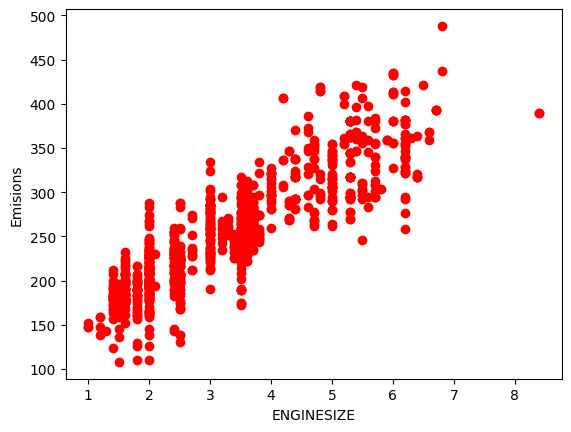

In [6]:
plt.scatter(df_.ENGINESIZE, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emisions")
plt.show()

In [7]:
mask = np.random.rand(len(df)) < 0.8
train = df_[mask]
test = df_[~mask]

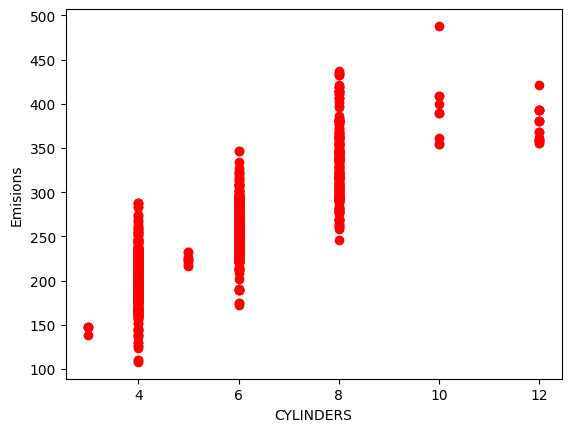

In [8]:
plt.scatter(df_.CYLINDERS, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("CYLINDERS")
plt.ylabel("Emisions")
plt.show()

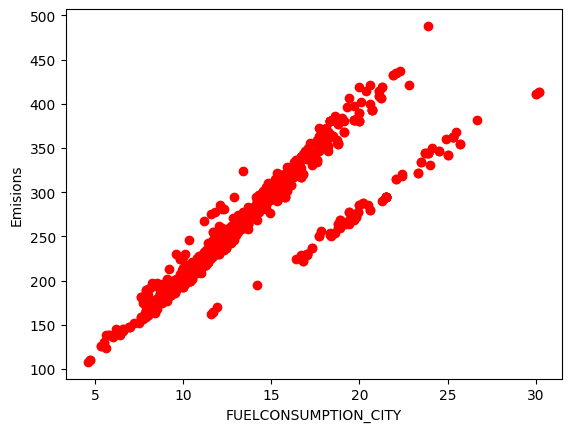

In [9]:
plt.scatter(df_.FUELCONSUMPTION_CITY, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emisions")
plt.show()

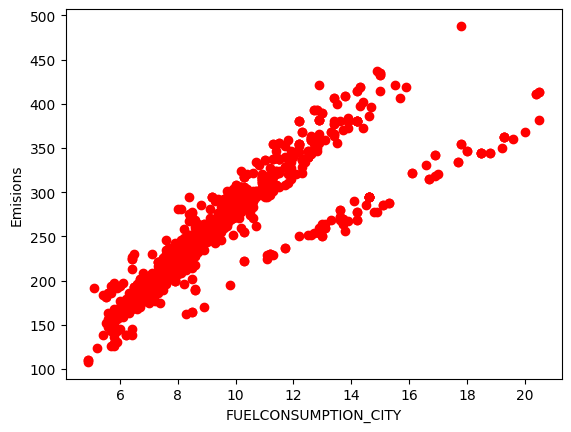

In [10]:
plt.scatter(df_.FUELCONSUMPTION_HWY, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emisions")
plt.show()

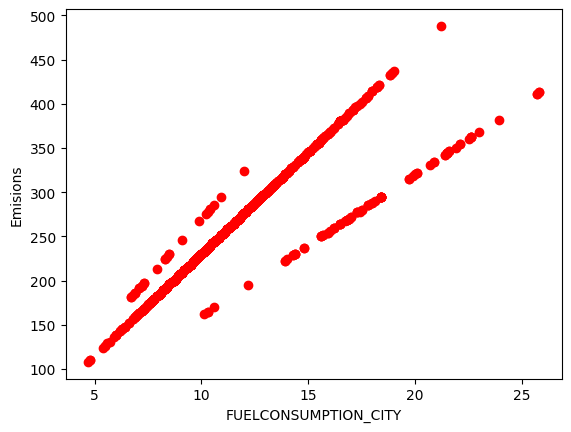

In [11]:
plt.scatter(df_.FUELCONSUMPTION_COMB, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emisions")
plt.show()

In [14]:
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)
print('Coefficients: ', reg.coef_)
print("Intersept: ", reg.intercept_)

Coefficients:  [[11.47436635  6.92935945  9.39191917]]
Intersept:  [68.67908587]


In [18]:
y_ = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_ - y) ** 2))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % reg.score(x,y))

Residual sum of squares: 589.72
Variance score: 0.87


c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
#practice
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)
print('Coefficients: ', reg.coef_)
print("Intersept: ", reg.intercept_)

Coefficients:  [[  1.42287309 -13.26900397  24.78694734]]
Intersept:  [75.84070626]


In [20]:
y_ = reg.predict(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_ - y) ** 2))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % reg.score(x,y))

Residual sum of squares: 812.96
Variance score: 0.82


c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
